In [12]:
import sys
sys.path.insert(0, '../..')
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy

In [13]:
listeners = [
    
]

In [14]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.7,
#    herding_behavior_mean = 0.1,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 0.25, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20)
#    spreading_rate = normal_ci(0.5, 1.5, 20)
)

sc = 10

population_size = 1000
simulation_cycles = 360 # days
seed = 31415
np.random.seed(seed)

params = copy.deepcopy(common_parameters)


By changing the coverage of school and work districts over the home districts we can make the disease spread faster or slower as desired .  
def setup_grid_layout(model, population_size,
        home_grid_height, home_grid_width,work_height,work_width, school_height, school_width):
    

Makes a grid of homogeneous home districts, overlaid by school and work districts.
    

home_grid_height is the number of home districts high the grid is, and
    

home_grid_width is the nmber of home districts wide the grid is
    

school height and work height are how many home districts high a school
    

district and work are respectively, and the same for their length.
    

each begins in grid 0,0 and cover the orignal home district grid.
    

Persons assigned to the home districts are also assigned to the school
    

and work districts that cover them. The parameters determine the amount
    

of leakage across groups of people.  With parameters (10,10,1,1,1,1), you get 100
    

completely separated districts with no leakage.  With parameters (6,6,2,2,3,3), illustrated below, you
    

get a grid where every one is connected to everyone else, but there is a
    

degree of separation.  For example, a person in home district (0,0) can be infected
    

by a person in (5,5) but it would be bridged by three infections, slowing the
    

virus down.  Larger sizes for work and school districts enable faster spread. Fastest
    

spread occurs with parameters (1,1,1,1,1,1) or equivalently (10,10, 10,10,10,10)
    

or any of the same number
    

Since this is just a way to allocate human interactions, no label is needed and
    

the grid need not be saved, for interactions to occur, although this informamtion
    

may be useful for visualizations. 


 


<img src="grids.jpg">

 Without locality, the defaults to multiple_run are :  home_grid_height = 1, home_grid_width = 1,work_height = 1, work_width =1, school_height=1, school_width=1.  


Save these seeds if you want to rerun a scenario
[9675, 7590, 802, 3752, 4216, 394, 7618, 6823, 155, 3025, 8816, 2520, 9015, 5373, 6450, 7800, 1660, 9188, 1483, 2526, 8201, 679, 1291, 6494, 909, 3893, 8248, 2433, 2843, 8253]
run with seed 9675:
run with seed 7590:
run with seed 802:
run with seed 3752:
run with seed 4216:
run with seed 394:
run with seed 7618:
run with seed 6823:
run with seed 155:
run with seed 3025:
run with seed 8816:
run with seed 2520:
run with seed 9015:
run with seed 5373:
run with seed 6450:
run with seed 7800:
run with seed 1660:
run with seed 9188:
run with seed 1483:
run with seed 2526:
run with seed 8201:
run with seed 679:
run with seed 1291:
run with seed 6494:
run with seed 909:
run with seed 3893:
run with seed 8248:
run with seed 2433:
run with seed 2843:
run with seed 8253:
using average of time series:
stats on susceptible:
data: [0.15076111111111112, 0.39815, 0.4190611111111111, 0.3115805555555556, 0.20064722222222223, 0.49013055555555557, 0.1243833

(<function dict.items>, <function dict.items>, <function dict.items>)

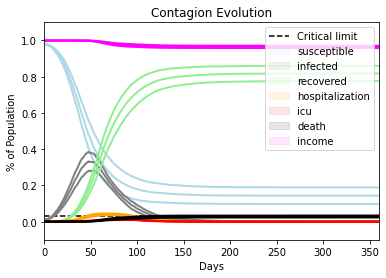

In [15]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong0", do_print = True, listeners = listeners)

 Locality slows down the spread, with parameters home_grid_height = 6, home_grid_width = 6,
                  work_height = 2, work_width =2, school_height=3, school_width=3

Save these seeds if you want to rerun a scenario
[6605, 9847, 6623, 8083, 2444, 6051, 2144, 8007, 2420, 8008, 8854, 7804, 4348, 7694, 9822, 2133, 9461, 8384, 8339, 9345, 4153, 479, 2888, 3343, 4470, 1957, 8242, 2332, 1578, 3787]
run with seed 6605:
run with seed 9847:
run with seed 6623:
run with seed 8083:
run with seed 2444:
run with seed 6051:
run with seed 2144:
run with seed 8007:
run with seed 2420:
run with seed 8008:
run with seed 8854:
run with seed 7804:
run with seed 4348:
run with seed 7694:
run with seed 9822:
run with seed 2133:
run with seed 9461:
run with seed 8384:
run with seed 8339:
run with seed 9345:
run with seed 4153:
run with seed 479:
run with seed 2888:
run with seed 3343:
run with seed 4470:
run with seed 1957:
run with seed 8242:
run with seed 2332:
run with seed 1578:
run with seed 3787:
using average of time series:
stats on susceptible:
data: [0.23351666666666668, 0.2546833333333334, 0.2197687957418496, 0.25598055555555554, 0.2506222222222222, 0.316880555

(<function dict.items>, <function dict.items>, <function dict.items>)

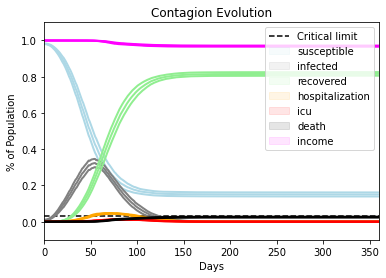

In [16]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


setLevel(logging.CRITICAL)
seeds =[5, 5348, 8388]
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong1", do_print = True, 
              listeners = listeners, home_grid_height = 6, home_grid_width = 6,
                  work_height = 2, work_width =2, school_height=3, school_width=3)

Save these seeds if you want to rerun a scenario
[8297, 1068, 7342, 844, 486, 5189, 261, 7533, 1969, 9113, 8029, 9028, 2776, 9710, 1123, 7018, 1514, 2837, 9096, 6886, 7864, 9410, 1472, 6579, 8692, 4516, 6816, 1169, 9868, 4504]
run with seed 8297:
run with seed 1068:
run with seed 7342:
run with seed 844:
run with seed 486:
run with seed 5189:
run with seed 261:
run with seed 7533:
run with seed 1969:
run with seed 9113:
run with seed 8029:
run with seed 9028:
run with seed 2776:
run with seed 9710:
run with seed 1123:
run with seed 7018:
run with seed 1514:
run with seed 2837:
run with seed 9096:
run with seed 6886:
run with seed 7864:
run with seed 9410:
run with seed 1472:
run with seed 6579:
run with seed 8692:
run with seed 4516:
run with seed 6816:
run with seed 1169:
run with seed 9868:
run with seed 4504:
using average of time series:
stats on susceptible:
data: [0.20377777777777772, 0.303525, 0.2755722222222222, 0.23198055555555558, 0.24168333333333333, 0.18973442004879132, 0.2

(<function dict.items>, <function dict.items>, <function dict.items>)

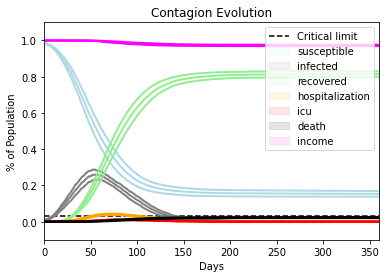

In [17]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


setLevel(logging.CRITICAL)
seeds = [5, 5348, 8388]
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong2", do_print = True, 
              listeners = listeners, home_grid_height = 3, home_grid_width = 4,
                  work_height = 1, work_width =2, school_height=2, school_width=1)

Save these seeds if you want to rerun a scenario
[5506, 3400, 5069, 1781, 1747, 3364, 1656, 5163, 3571, 1421, 1279, 4118, 3394, 5328, 5451, 724, 6981, 9501, 3862, 3170, 8302, 5675, 2311, 9327, 7038, 1685, 4147, 9265, 3065, 7197]
run with seed 5506:
run with seed 3400:
run with seed 5069:
run with seed 1781:
run with seed 1747:
run with seed 3364:
run with seed 1656:
run with seed 5163:
run with seed 3571:
run with seed 1421:
run with seed 1279:
run with seed 4118:
run with seed 3394:
run with seed 5328:
run with seed 5451:
run with seed 724:
run with seed 6981:
run with seed 9501:
run with seed 3862:
run with seed 3170:
run with seed 8302:
run with seed 5675:
run with seed 2311:
run with seed 9327:
run with seed 7038:
run with seed 1685:
run with seed 4147:
run with seed 9265:
run with seed 3065:
run with seed 7197:
using average of time series:
stats on susceptible:
data: [0.5538138888888888, 0.5173222222222222, 0.4528527777777777, 0.4895083333333334, 0.41778883360972907, 0.3999889331

(<function dict.items>, <function dict.items>, <function dict.items>)

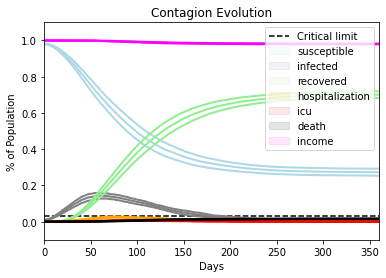

In [18]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


setLevel(logging.CRITICAL)
seeds = [5, 5348, 8388]
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong3", do_print = True, 
              listeners = listeners, home_grid_height = 3, home_grid_width = 4,
                  work_height = 1, work_width =1, school_height=1, school_width=1)

In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


setLevel(logging.CRITICAL)
seeds = [5, 5348, 8388]
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong4", do_print = True, 
              listeners = listeners, home_grid_height = 10, home_grid_width = 10,
                  work_height = 1, work_width =1, school_height=1, school_width=1)

Save these seeds if you want to rerun a scenario
[9694, 2462, 7657, 698, 7772, 8171, 2020, 3091, 9057, 1507, 1706, 9314, 4330, 4940, 8895, 2728, 3789, 2246, 6900, 8679, 9604, 3071, 7260, 8773, 1550, 5648, 6500, 4590, 3737, 4276]
run with seed 9694:
run with seed 2462:
run with seed 7657:
run with seed 698:
run with seed 7772:
run with seed 8171:
run with seed 2020:
run with seed 3091:
run with seed 9057:
run with seed 1507:
run with seed 1706:
run with seed 9314:
run with seed 4330:
run with seed 4940:
run with seed 8895:
